In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

## Part 1: Prepare the Data

In [2]:
# Read CSV and drop MYOPIC column
file_path = Path('Resources/myopia.csv')
myopia = pd.read_csv(file_path)
df_myopia = pd.read_csv(file_path).drop('MYOPIC', axis=1)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [3]:
# Confirm data types are numeric
df_myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [4]:
# Check for null values
for column in df_myopia.columns:
    print(f"Column {column} has {df_myopia[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [5]:
for column in myopia.columns:
    print(f"Column {column} has a max value of {myopia[column].max()}")

Column AGE has a max value of 9
Column SPHEQ has a max value of 4.372000217
Column AL has a max value of 24.55999947
Column ACD has a max value of 4.25
Column LT has a max value of 4.111999989
Column VCD has a max value of 17.29999924
Column SPORTHR has a max value of 45
Column READHR has a max value of 20
Column COMPHR has a max value of 30
Column STUDYHR has a max value of 15
Column TVHR has a max value of 31
Column DIOPTERHR has a max value of 101
Column MOMMY has a max value of 1
Column DADMY has a max value of 1
Column MYOPIC has a max value of 1


In [6]:
# Check for duplicate entries
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")

Duplicate entries: 0


In [7]:
df_myopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [8]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR']])

In [9]:
# Create a DataFrame with the transformed data
new_myopia = pd.DataFrame(scaled_data, columns = df_myopia.columns[:12])
new_myopia[['MOMMY', 'DADMY']] = df_myopia[['MOMMY', 'DADMY']]
new_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,0


## Part 2: Apply Dimensionality Reduction

In [10]:
# Initialize PCA Model
pca = PCA(n_components=0.90)

# Get principal components for the data
myopia_pca = pca.fit_transform(new_myopia)

In [11]:
# Transform PCA data to a DataFrame (pc = principal component)
df_myopia_pca = pd.DataFrame(data = myopia_pca, columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6',\
                                                          'pc_7', 'pc_8', 'pc_9'])
df_myopia_pca.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9
0,0.509064,1.240002,0.756795,-3.399057,-1.372825,-2.062353,-1.846270,0.142164,-1.354360
1,-0.659781,-1.479657,-0.443546,0.728013,-0.210619,0.132010,-0.434612,-0.627053,-0.354412
2,-0.905146,-0.816177,0.736691,-0.161225,0.903472,-0.048094,0.187300,0.075242,-0.172101
3,0.117579,1.143982,-0.978658,-1.216472,-2.095468,-1.900045,-0.315069,-0.541609,0.693329
4,-0.406560,-2.788647,0.560417,-0.462657,-0.278111,-0.882195,0.701336,0.528334,0.107169


In [12]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.23709653, 0.17470773, 0.09439418, 0.08260749, 0.07899141,
       0.07203043, 0.07101828, 0.05837071, 0.0488404 ])

In [13]:
# Create labels based off whether or not the child has myopia
labels = myopia['MYOPIC']
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [14]:
# Run t-SNE
tsne = TSNE(learning_rate = 500)
tsne_features = tsne.fit_transform(myopia_pca)

# Check that the dimensions have been reduced to 2
tsne_features.shape

(618, 2)

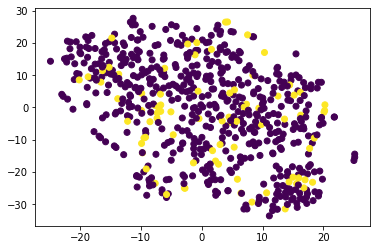

In [15]:
# Plot the results in color using the labels
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = labels)
plt.show()

In [16]:
# Run t-SNE
tsne = TSNE(learning_rate = 250)
tsne_features = tsne.fit_transform(myopia_pca)

# Check that the dimensions have been reduced to 2
tsne_features.shape

(618, 2)

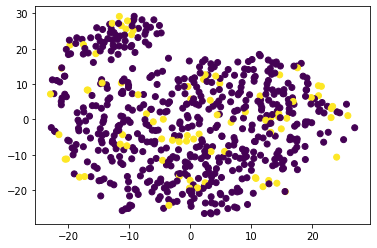

In [17]:
# Plot the results in color using the labels
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = labels)
plt.show()

In [18]:
# Run t-SNE
tsne = TSNE(learning_rate = 100)
tsne_features = tsne.fit_transform(myopia_pca)

# Check that the dimensions have been reduced to 2
tsne_features.shape

(618, 2)

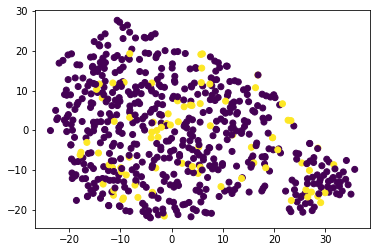

In [19]:
# Plot the results in color using the labels
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = labels)
plt.show()

In [20]:
# Run t-SNE
tsne = TSNE(learning_rate = 50)
tsne_features = tsne.fit_transform(myopia_pca)

# Check that the dimensions have been reduced to 2
tsne_features.shape

(618, 2)

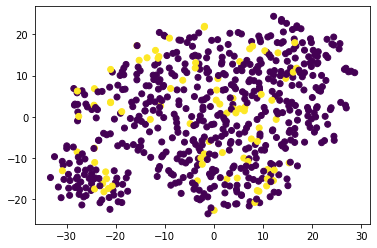

In [21]:
# Plot the results in color using the labels
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = labels)
plt.show()

## Part 3: Preform a Cluster Analysis with K-means

In [22]:
inertia = []
k = list(range(1,11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters = i, random_state = 10)
    km.fit(new_myopia)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {'k': k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7724.972492
1,2,6571.031691
2,3,5805.143054
3,4,5438.345142
4,5,5164.478686


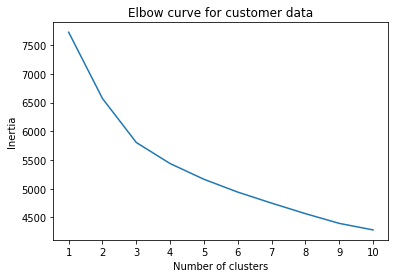

In [23]:
 # Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [24]:
 def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["CLASS"] = model.labels_

    return data

In [25]:
clusters = get_clusters(3, new_myopia)
clusters.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,CLASS
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1,0
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1,2
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,0,1
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,0,2


In [26]:
def show_clusters(df):
    plt.scatter(df['STUDYHR'], df['VCD'], c=df['CLASS'])
    plt.xlabel('STUDYHR')
    plt.ylabel('VCD')
    plt.show()

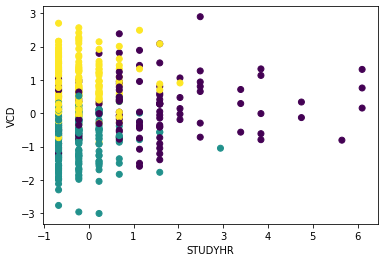

In [27]:
show_clusters(clusters)

In [28]:
def show_clusters(df):
    plt.scatter(df['AL'], df['TVHR'], c=df['CLASS'])
    plt.xlabel('AL')
    plt.ylabel('TVHR')
    plt.show()

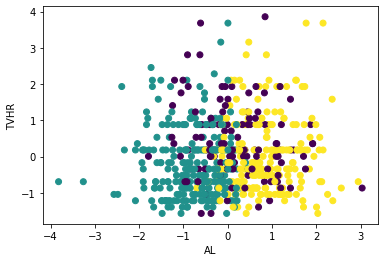

In [29]:
show_clusters(clusters)

In [30]:
def show_clusters(df):
    plt.scatter(df['SPORTHR'], df['ACD'], c=df['CLASS'])
    plt.xlabel('SPORTHR')
    plt.ylabel('ACD')
    plt.show()

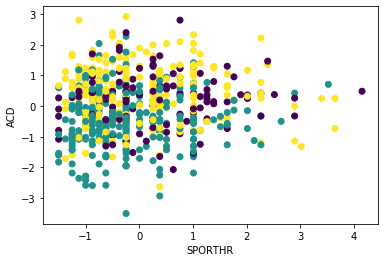

In [31]:
show_clusters(clusters)

In [32]:
def show_clusters(df):
    plt.scatter(df['DIOPTERHR'], df['SPHEQ'], c=df['CLASS'])
    plt.xlabel('DIOPTERHR')
    plt.ylabel('SPHEQ')
    plt.show()

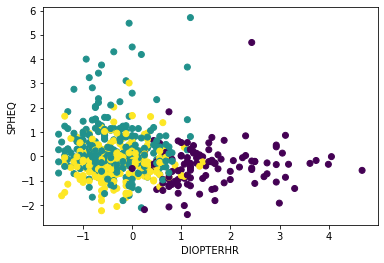

In [33]:
show_clusters(clusters)

## Part 4: Make a Recommendation

After running the t-SNE algorithm multiple times using different learning rates, it doesn't appear the data can effectively be split up into distinct clusters. In addition, reviewing the elbow curve generated from the K-means algorithm, the number of clusters is three. Graphing out the data in different configurations also does not display dinstinct clusters. Unfortunately, at this time there doesn't appear to be a clear way to improve the classification model.